<a href="https://colab.research.google.com/github/vatturisrinivas/op_project/blob/main/Identifying_age_group_and_classifying_an_actor_using_Kaggle_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving 214c5959-1ac6-4e71-bfee-92fbd4879cc4.jpeg to 214c5959-1ac6-4e71-bfee-92fbd4879cc4.jpeg


{'214c5959-1ac6-4e71-bfee-92fbd4879cc4.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x02e\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x16\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xec\x98\xf6 *P"\x8a0\x1c\xadQQP\x06\x83\x84PV\x03\x80\x1c (\xd0p\xd0p\xd5\x14\x10Q\x08Q\xa0\xe1\xaa*\xb1\t\x16\x07\x8f\x1a\xa0\r\x14\x14APQ\nQ\x14\x1f\x1b\xa1\xc8\x8d\x1e1G\x8dQ\xcdT\x14@j+D\x04\xa1\xa0\x00\n\xe6\x83\xda\x88*\x00\xa0\x82

In [3]:
!mkdir -p ~/.kaggle
!cp 'kaggle (1).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



cp: cannot stat 'kaggle (1).json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
import kagglehub
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")
print("Dataset path:", path)


100%|██████████| 52.9M/52.9M [00:01<00:00, 44.1MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import kagglehub

# Download and get the path
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")
print("Path to dataset files:", path)

image_height = 128
image_width = 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("Classes found:", train_generator.class_indices)

num_classes = len(train_generator.class_indices)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=validation_generator, epochs=5)

model.save('trained_model_NEW_2_2_Dataset.h5')


Using Colab cache for faster access to the 'celebrity-face-image-dataset' dataset.
Path to dataset files: /kaggle/input/celebrity-face-image-dataset
Found 1440 images belonging to 1 classes.
Found 360 images belonging to 1 classes.
Classes found: {'Celebrity Faces Dataset': 0}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


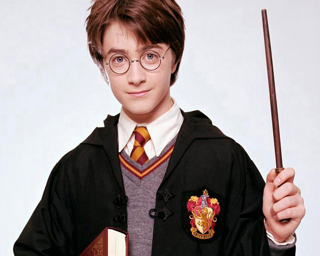

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predictions are: [[1.]]
Predicted Age Group Index: 0
Predicted Age Group: YOUNG


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
model = load_model('trained_model_NEW_2_2_Dataset.h5')
# Function to load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img
image_url='https://static.independent.co.uk/s3fs-public/thumbnails/image/2013/09/12/17/potter.jpg'
new_face = load_image_from_url(image_url)
new_face = new_face.resize((320, 256))
display(new_face)
new_face = new_face.resize((image_width, image_height))
new_face = np.array(new_face) / 255.0  # Normalize the image
new_face = np.expand_dims(new_face, axis=0)
predictions = model.predict(new_face)
predicted_age_group = np.argmax(predictions)
print("Predictions are:", predictions)
print("Predicted Age Group Index:", predicted_age_group)
age_mapping = {0: 'YOUNG', 1: 'MIDDLE', 2: 'OLD'}
predicted_age_group_label = age_mapping[predicted_age_group]
print("Predicted Age Group:", predicted_age_group_label)
